In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from pandas import DataFrame

In [ ]:
churn_pca=pd.read_csv("churn_clean.csv")
churn_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [ ]:
#identify missing values
churn_pca.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [ ]:
#identify duplicates
churn_pca.duplicated().value_counts()

False    10000
dtype: int64

In [ ]:
data=churn_pca.select_dtypes(exclude='object')
data.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [ ]:
data.shape

(10000, 23)

In [ ]:
#select the continuous variables
data=data.drop(['CaseOrder','Zip', 'Population','Children','Yearly_equip_failure', 'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)
data.columns

Index(['Lat', 'Lng', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [ ]:
data.shape

(10000, 10)

In [ ]:
#identify missing values
data.isnull().sum()

Lat                   0
Lng                   0
Age                   0
Income                0
Outage_sec_perweek    0
Email                 0
Contacts              0
Tenure                0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64

In [ ]:
variables=data[['Age', 'Income','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
variables

,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,68,28561.99,6.795513,172.455519,904.536110
1,27,21704.77,1.156681,242.632554,800.982766
2,50,9609.57,15.754144,159.947583,2054.706961
3,48,18925.23,17.087227,119.956840,2164.579412
4,83,40074.19,1.670972,149.948316,271.493436
...,...,...,...,...,...
9995,23,55723.74,68.197130,159.979400,6511.252601
9996,48,34129.34,61.040370,207.481100,5695.951810
9997,48,45983.43,47.416890,169.974100,4159.305799
9998,39,16667.58,71.095600,252.624000,6468.456752


In [ ]:
#standardize the data
columns = variables.columns
robust = RobustScaler()
scaled_data = robust.fit_transform(variables)
scaled= pd.DataFrame(scaled_data, columns=columns)
scaled

,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.416667,-0.135462,-0.534613,0.081817,-0.546019
1,-0.722222,-0.337018,-0.639889,1.236890,-0.569826
2,-0.083333,-0.692535,-0.367356,-0.124057,-0.281591
3,-0.138889,-0.418717,-0.342468,-0.782281,-0.256331
4,0.833333,0.202919,-0.630288,-0.288639,-0.691557
...,...,...,...,...,...
9995,-0.833333,0.662909,0.611750,-0.123533,0.742979
9996,-0.138889,0.028180,0.478134,0.658318,0.555540
9997,-0.138889,0.376610,0.223785,0.040974,0.202261
9998,-0.388889,-0.485077,0.665864,1.401343,0.733141


In [ ]:
#create pca and apply to continuous variables
pca=PCA()
pca_model=pca.fit_transform(scaled)
pca_model

array([[-0.33905553, -0.48074274,  0.59901134,  0.41325794, -0.02366639],
       [-0.54520046,  0.33851132,  1.37713553, -0.75481096, -0.0249119 ],
       [-0.88894676, -0.45711986,  0.2189514 , -0.08596396,  0.0396097 ],
       ...,
       [ 0.18507074,  0.14792288, -0.25722648, -0.13800169, -0.04932452],
       [-0.68160376,  1.63260299,  0.05002691, -0.42607264, -0.03995928],
       [-0.90113893,  1.05052288, -0.16426782, -0.71900923, -0.02283773]])

In [ ]:
#determine matrix
pcomp=np.arange(pca.n_components_)+1
pcomp

array([1, 2, 3, 4, 5])

In [ ]:
#explained variance
exp_var=pca.explained_variance_ratio_
exp_var

array([0.3412645 , 0.25426055, 0.23953779, 0.16420582, 0.00073134])

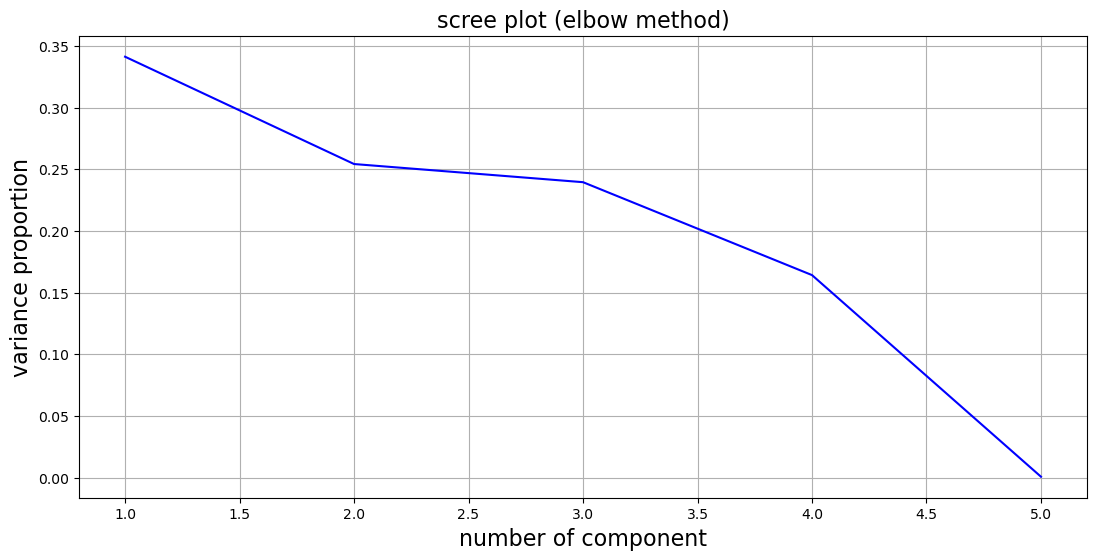

In [ ]:
# Plot scree plot
plt.figure(figsize=(13, 6))
plt.plot(pcomp, exp_var, 'b-')
plt.title('scree plot (elbow method)', fontsize=16)
plt.xlabel('number of component',fontsize=16)
plt.ylabel('variance proportion', fontsize=16)
plt.grid()
plt.show()


In [ ]:
model=pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5'], index=variables.columns).T
model

,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC1,-0.005578,0.999912,0.005324,-0.008876,0.006148
PC2,0.018999,0.001879,0.423966,0.776565,0.465656
PC3,0.015284,0.011964,-0.559320,0.628710,-0.539916
PC4,0.999489,0.005375,0.014709,-0.023787,-0.014523
PC5,0.019908,-0.000691,-0.712159,-0.032029,0.701005


In [ ]:
variance=pca.explained_variance_
var_table=pd.DataFrame(variance, columns=['Variance'], index=[f'Component {i+1}' for i in range(len(variance))])
var_table

,Variance
Component 1,0.687093
Component 2,0.511922
Component 3,0.482279
Component 4,0.330608
Component 5,0.001472


In [ ]:
#total variance
total_var=sum(variance)
print("total variance captured by principal components:", total_var)

total variance captured by principal components: 2.0133741069859816


In [ ]:
pd.DataFrame(scaled).to_csv("standardized_data.csv", index=False)